In [1]:
import pandas as pd

In [5]:
db = pd.read_csv('/Users/Ayesha Sulthana/Documents/jupyter/Projects/python/diabetes/diabetes.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
db['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
db.duplicated().sum()

0

# Preliminary Statistical Analysis

In [16]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis(EDA)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

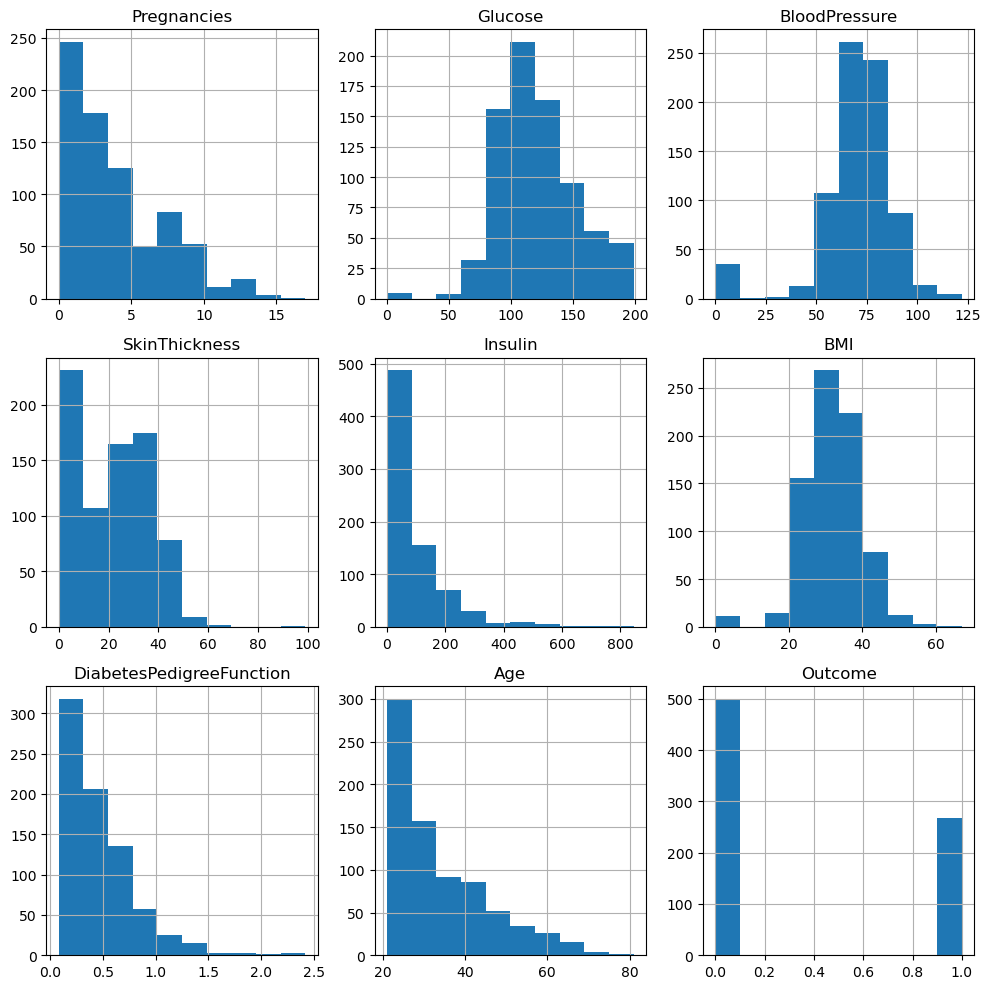

In [31]:
db.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [33]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

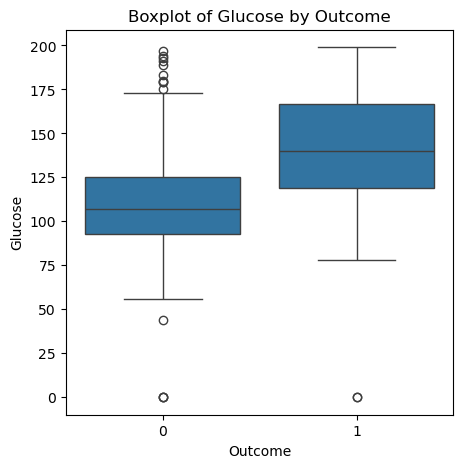

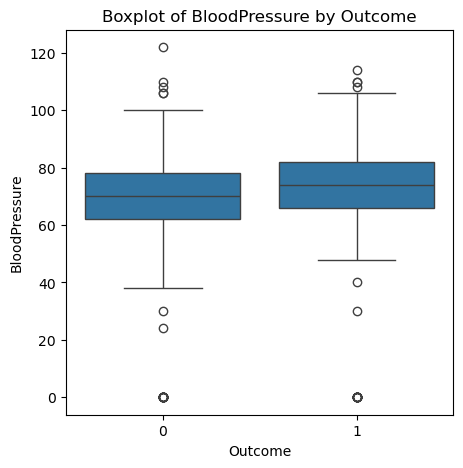

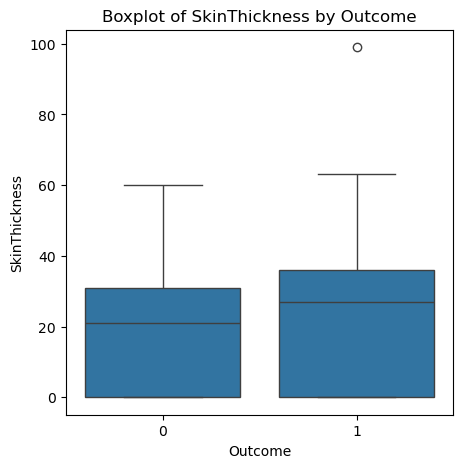

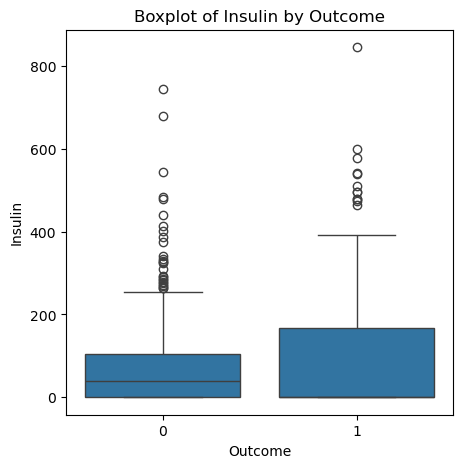

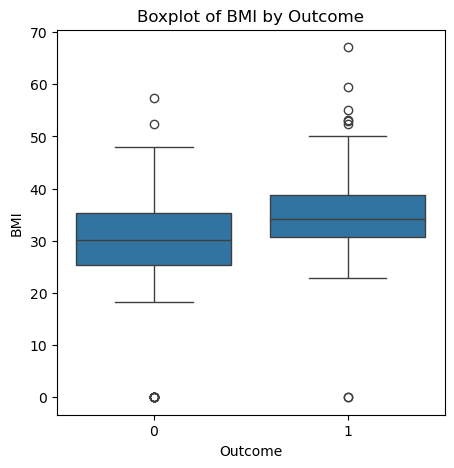

In [49]:
for i in cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(x='Outcome', y=i, data=db)
    plt.title(f'Boxplot of {i} by Outcome')
    plt.show()

# Analyse the Relationship Among Predictor Variables

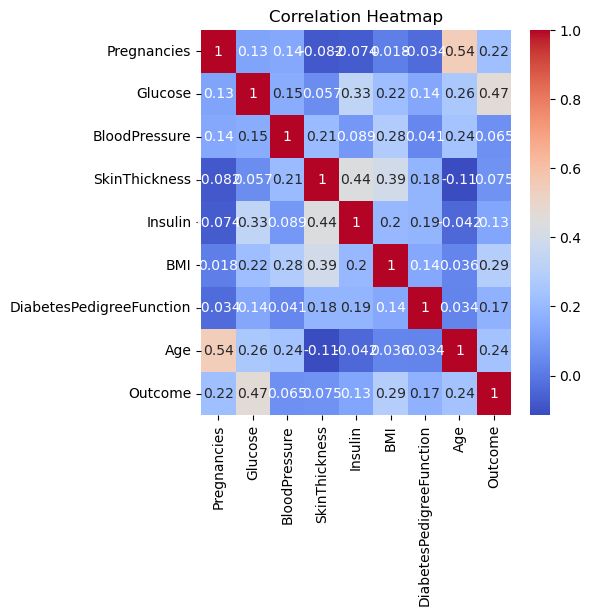

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(db.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Visualization

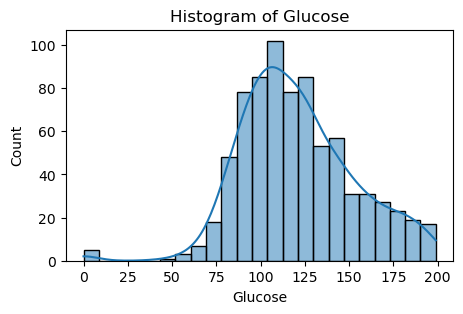

In [63]:
plt.figure(figsize=(5,3))
sns.histplot(db['Glucose'], kde=True)
plt.title('Histogram of Glucose')
plt.show()

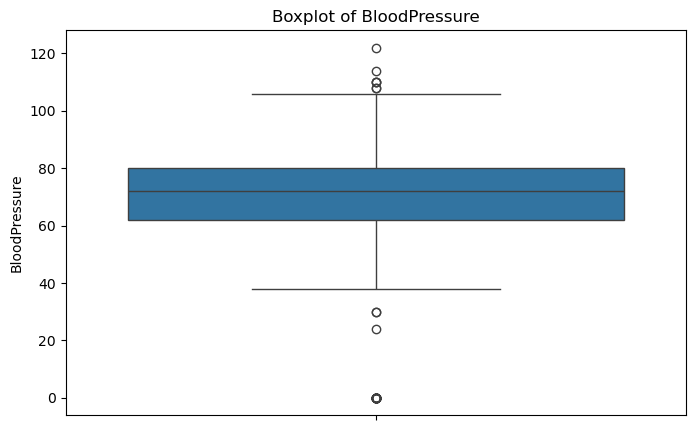

In [65]:
plt.figure(figsize=(8,5))
sns.boxplot(y='BloodPressure',data=db)
plt.title('Boxplot of BloodPressure')
plt.show()

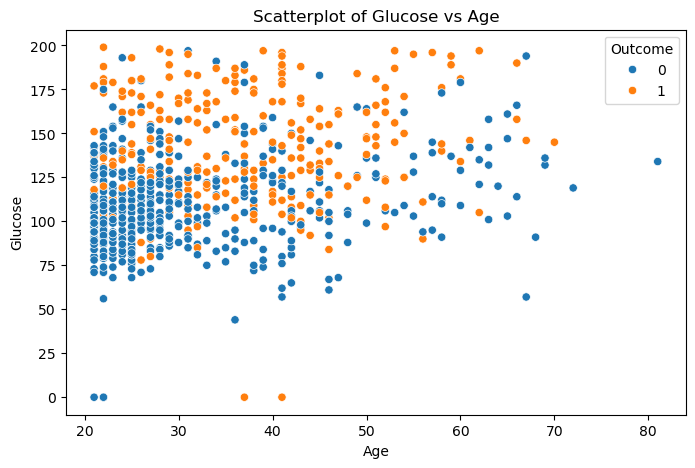

In [67]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=db)
plt.title('Scatterplot of Glucose vs Age')
plt.show()

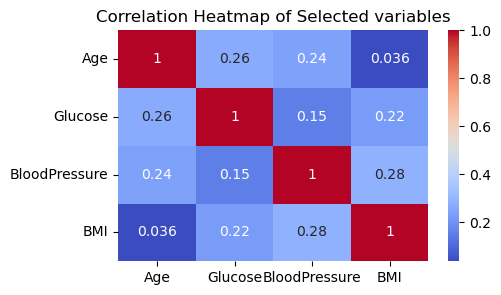

In [73]:
subset = db[['Age', 'Glucose', 'BloodPressure', 'BMI']]
plt.figure(figsize=(5,3))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected variables')
plt.show()

C:\Users\Ayesha Sulthana\AppData\Local\Temp\ipykernel_9828\2377094805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Glucose', data=db, palette='winter')


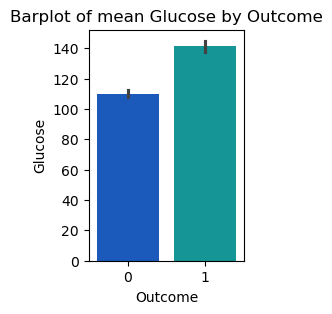

In [91]:
plt.figure(figsize=(2,3))
sns.barplot(x='Outcome', y='Glucose', data=db, palette='winter')
plt.title('Barplot of mean Glucose by Outcome')
plt.show()

In [93]:
mean_values = db.groupby('Outcome').mean()

print(mean_values)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  
